In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Group Project - Statistics for Data Science/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.shape

(319795, 18)

In [ ]:
# check if there are any missing values
df.isnull().values.any()

np.False_

<hr>

**Main research questions**:

What are the relationships/associations of each indicator with heart disease and how does each indicator contribute to heart disease?

<hr>

**HYPOTHESIS: DOES SMOKING CONTRIBUTE TO HEART DISEASE?**

In [ ]:
df['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Given that the data type for both Smoking and HeartDisease are Categorical,
# we use Chi-Square to test the association/relationship between Smoking and HeartDisease
# In other words, does smoking influence the likelihood of having heart disease?

from scipy.stats import chi2_contingency

crosstab_smoking_heartdisease = pd.crosstab(df['Smoking'], df['HeartDisease'])
print("Cross tabulation Table between Heart Disease and Smoking:\n\n", crosstab_smoking_heartdisease)

Cross tabulation Table between Heart Disease and Smoking:

 HeartDisease      No    Yes
Smoking                    
No            176551  11336
Yes           115871  16037


In [ ]:
chi2, p_value, dof, expected = chi2_contingency(crosstab_smoking_heartdisease)
print(f"\nChi-squared statistic: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")


Chi-squared statistic: 3713.0331
P-value: 0.000000


In [ ]:
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant association between smoking and heart disease.")
else:
    print("There is no statistically significant association between smoking and heart disease.")

print("A low p-value provide stong evidence to reject the null hypothesis (Smoking doesn't contribute to Heart Disease).")

There is a statistically significant association between smoking and heart disease.
A low p-value provide stong evidence to reject the null hypothesis (Smoking doesn't contribute to Heart Disease).


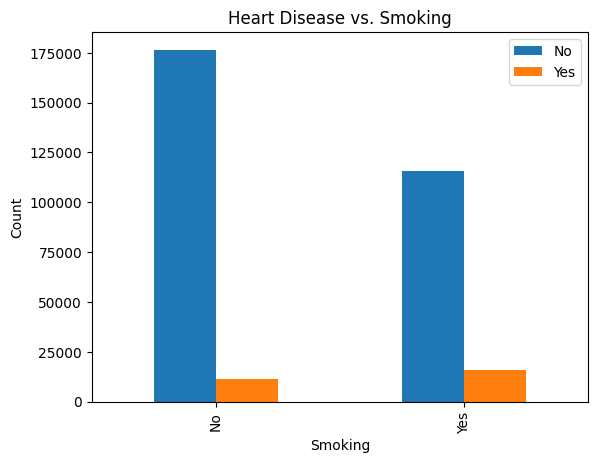

In [ ]:
import matplotlib.pyplot as plt

# Grouped bar chart
pd.crosstab(df['Smoking'], df['HeartDisease']).plot(kind='bar', stacked=False)
plt.title('Heart Disease vs. Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(['No', 'Yes'])
plt.show()

The chi-square test aims to determine if there's a relationship between two categorical variables.

**Hypothesis:**
* null hypothesis (H₀) - there is no association between smoking and heart disease, that is they are independent.<br>
* alternative hypothesis(H₁) - there is an association between smoking and heart disease, that is they are dependent.<br>

**Evaluation of P-value:**
The p-value (0.000000) represents the probability of observing the data if the null hypothesis were true. A very small p-value indicates that it's highly unlikely to observe the data if there were truly no association between smoking and heart disease. In this case, the p-value of 0.000000 is extremely small, essentially zero. This means that if smoking and heart disease were truly independent, it would be virtually impossible to observe the data.

**Interpretation of Chi-Square Statistic:**
The chi-square statistic (3713.0331) measures the difference between the observed frequencies in the cross-tabulation table and the expected frequencies if the variables were independent. A larger chi-square statistic indicates a greater difference between observed and expected frequencies. Because the p-value is so low, this very large chi squared value is considered to be statistically significant. Because the result is statistically significant, we can reject the null hypothesis.

**Conclusions:**
Because the p-value is so low and the chi-square statistic is very large, we can reject the null hypothesis. This means there is a statistically significant association between smoking and heart disease. In practical terms, this suggests that smoking and heart disease are related. People who smoke are more likely to have heart disease. It is very important to remember that correlation does not equal causation. While this test shows that there is a relationship between smoking and heart disease, it does not prove that smoking causes heart disease.

While the chi-square test indicates an association, it doesn't reveal the strength or direction of the relationship.

In summary, the very large chi-square statistic and the extremely low p-value provide strong evidence that smoking and heart disease are associated.

<hr>

**HYPOTHESIS: DOES MENTAL HEALTH CONTRIBUTE TO HEART DISEASE?**

In [ ]:
df['MentalHealth'].unique()

array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 13.,
       23., 27., 26., 11., 19.])

Mean values:
   HeartDisease  MentalHealth
0           No      3.828778
1          Yes      4.641764


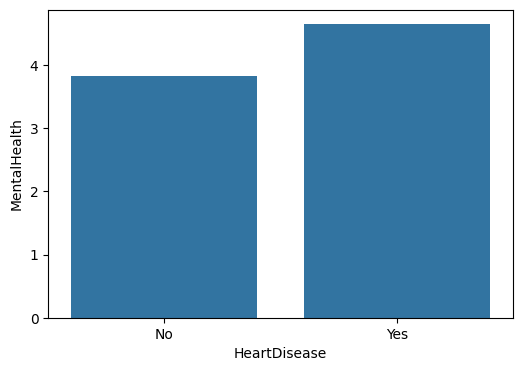

In [ ]:
import seaborn as sns

mean_values = df.groupby('HeartDisease')['MentalHealth'].mean().reset_index()
print("Mean values:\n",mean_values)
plt.figure(figsize=(6, 4))
sns.barplot(x='HeartDisease', y='MentalHealth', data=mean_values)
plt.show()

In [ ]:
#  Test if MentalHealth column is Normally Distributed (Gaussian)
from scipy.stats import shapiro

stat, p = shapiro(df['MentalHealth'])
print(f"Shapiro-Wilk statistic: {stat}, p-value: {p}")
if p > 0.05:
    print("Probably Gaussian")
else:
    print("Probably not Gaussian")

Shapiro-Wilk statistic: 0.5511175108808577, p-value: 6.370801029852066e-186
Probably not Gaussian


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 319795.
  res = hypotest_fun_out(*samples, **kwds)


Given that MentalHealth is of Numerical DataType and HeartDisease is of Categorical DataType, and MentalHealth column is not normally Distributed, we use a non-parametric test (a method of statistical analysis that does not require any distribution to meet the required assumptions) to check the relationship/association between MentalHealth and HeartDisease.<br>
A non-parametric test:
* is also known as a distribution-free test;
* is not based on underlying assumptions, but mainly on differences in medians; and
* is useful when the data is not normally distributed.

The non-parametric test that fit our scenario is the **Mann-Whitney U-test**:
* This test is used when the categorical variable has only two categories (binary).
* It's the non-parametric equivalent of the independent samples t-test.
* It assesses whether there are statistically significant differences between the medians of the two groups.

In [ ]:
from scipy.stats import mannwhitneyu

group1 = df['MentalHealth'][df['HeartDisease'] == 'Yes']
group2 = df['MentalHealth'][df['HeartDisease'] == 'No']
stat, p = mannwhitneyu(group1, group2)
print(f"Mann-Whitney U statistic: {stat}, p-value: {p}")
if p > 0.05:
    print("No significant differences between groups")
else:
    print("Significant differences between groups")

Mann-Whitney U statistic: 3977851921.5, p-value: 0.051433175597980295
No significant differences between groups


P-value slightly above 0.05:
* A p-value of 0.0514 is very close to the conventional significance level of 0.05.
* This means that there's borderline evidence against the null hypothesis (that there's no difference between the groups).
* It suggests that there might be a small effect, but it's not strong enough to be considered statistically significant at the 0.05 level.

The Mann-Whitney U test results suggest that there's weak evidence of a relationship between mental health and heart disease.

<hr>

**HYPOTHESIS: DOES HAVING KIDNEY DISEASE RAISE THE RISK OF HEART DISEASE?**

In [ ]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

In [ ]:
# Extract the KidneyDisease and HeartDisease data from the heart_2020_cleaned dataset to form a dataframe, kidney_heart_df.

kidney_heart_df = pd.read_csv('/content/drive/My Drive/Group Project - Statistics for Data Science/heart_2020_cleaned.csv' , usecols=['KidneyDisease', 'HeartDisease'])
kidney_heart_df

,HeartDisease,KidneyDisease
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
319790,Yes,No
319791,No,No
319792,No,No
319793,No,No


In [ ]:
kidney_heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   HeartDisease   319795 non-null  object
 1   KidneyDisease  319795 non-null  object
dtypes: object(2)
memory usage: 4.9+ MB


In [ ]:
kidney_heart_df['KidneyDisease'].value_counts()

,count
KidneyDisease,
No,308016
Yes,11779


#### It is appropriate to use Chi-Square Test of Independence method to determine if there is an association between Kidney Disease and Heart Disease as these two variables meet the following Chi-Square Test data requirements:
- Two categorical variables.
- Two or more categories (groups) for each variable.
- Independence of observations (i.e. There is no relationship between the subjects in each group).
- Relatively large sample size. Refer to the above variables' value counts.

In [ ]:
# Create a Contingency Table for evaluating association, if any, between kidney disease and heart disease.

crosstab_kidney_heartdisease = pd.crosstab(kidney_heart_df['KidneyDisease'],
kidney_heart_df['HeartDisease'])

crosstab_kidney_heartdisease

HeartDisease,No,Yes
KidneyDisease,,
No,284098,23918
Yes,8324,3455


In [ ]:
# Pass the crosstab variable through the chi2_contingency() method to conduct a Chi-square test of independence.

chi2, p_value, dof, expected = chi2_contingency(crosstab_kidney_heartdisease)

nl = "\n"
print(f"Chi2 value={chi2}{nl} p-value={p_value}{nl} Degrees of freedom={dof}{nl} Expected frequency={expected}")

Chi2 value=6739.226167871357
 p-value=0.0
 Degrees of freedom=1
 Expected frequency=[[281651.22891853  26364.77108147]
 [ 10770.77108147   1008.22891853]]


#### Interpreting the Chi-Square Test results

The first value (6739.226) is the Chi-Square value, followed by the p-value (0), then the degrees of freedom (1), and lastly all of the expected frequencies are greater than 5, the chi2 test results can be trusted.

Typically, the null hypothesis can be rejected if the p-value is less than 0.05 (i.e. there is less than 5% risk of concluding that an association between the variables exists when there is no actual association). The chi2 test results indicate that there is an association between Kidney Disease and Heart Disease.

<hr>

**HYPOTHESIS: DOES THE AMOUNT OF SLEEP LINK TO HAVING HEART DISEASE?**


In [ ]:
# Extract the SleepTime and HeartDisease data from the heart_2020_cleaned dataset to form a dataframe, sleep_heart_df.

sleep_heart_df = pd.read_csv('/content/drive/My Drive/Group Project - Statistics for Data Science/heart_2020_cleaned.csv' , usecols=['HeartDisease', 'SleepTime'])
sleep_heart_df

,HeartDisease,SleepTime
0,No,5.0
1,No,7.0
2,No,8.0
3,No,6.0
4,No,8.0
...,...,...
319790,Yes,6.0
319791,No,5.0
319792,No,6.0
319793,No,12.0


In [ ]:
sleep_heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   HeartDisease  319795 non-null  object 
 1   SleepTime     319795 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.9+ MB


In [ ]:
sleep_heart_df['SleepTime'].value_counts()

,count
SleepTime,
7.0,97751
8.0,97602
6.0,66721
5.0,19184
9.0,16041
10.0,7796
4.0,7750
12.0,2205
3.0,1992


In [ ]:
sleep_heart_df['HeartDisease'].value_counts()

,count
HeartDisease,
No,292422
Yes,27373


In [ ]:
# Create a Contingency Table for evaluating association, if any, between sleep time and heart disease.

crosstab_sleep_heartdisease = pd.crosstab(sleep_heart_df['SleepTime'],
kidney_heart_df['HeartDisease'])

crosstab_sleep_heartdisease

HeartDisease,No,Yes
SleepTime,,
1.0,491,60
2.0,660,128
3.0,1645,347
4.0,6570,1180
5.0,17154,2030
6.0,61294,5427
7.0,91426,6325
8.0,89244,8358
9.0,14345,1696


It is appropriate to use a non-parametric test such as the Spearman's Rank Correlation to determine if there is an association between SleepTime and HeartDisease as these variables meet the following Spearman Correlation Test data requirements:
- One variable is a numerical datatype and the other variable is a categorical datatype.
- The variables are not normally distributed.
- The variable has a monotonic relationship (i.e. as one variable increases, the other variable either increases or decreases).

In [ ]:
coef, p = stats.spearmanr(sleep_heart_df['SleepTime'], sleep_heart_df['HeartDisease'])

print("Spearman's correlation coefficient:", coef,'\n',"p-value:", p)

Spearman's correlation coefficient: 0.007520663701263623 
 p-value: 2.1091575494879336e-05


#### Interpreting the Spearman's test results

The Spearman test generated a correlation coefficient of 0.007520, it is a statistical measure of the strength of a relationship between sleep time and heart disease. This very small positive coefficient indicates that the sleep time and heart disease have a very weak positive monotonic relationship.

A small p-value of 0.000021 indicates the observed correlation is unlikely due to random chance.

<hr>

**HYPOTHESIS: LINK BETWEEN ALCOHOL DRINKING AND HEART DISEASE**

Missing values:
 HeartDisease       0
AlcoholDrinking    0
dtype: int64


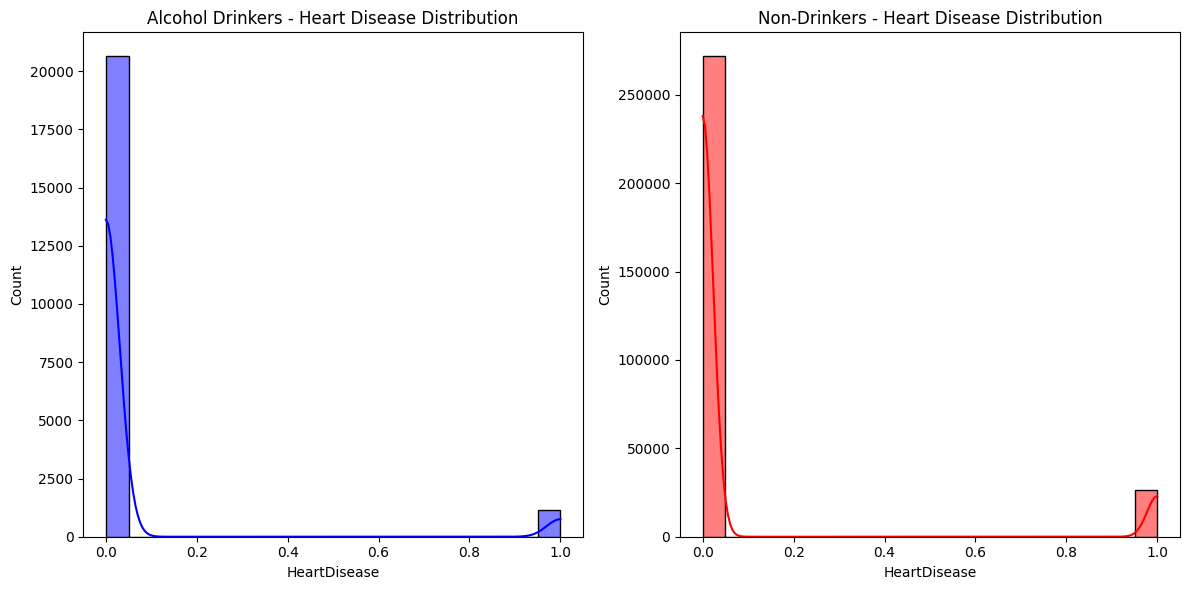

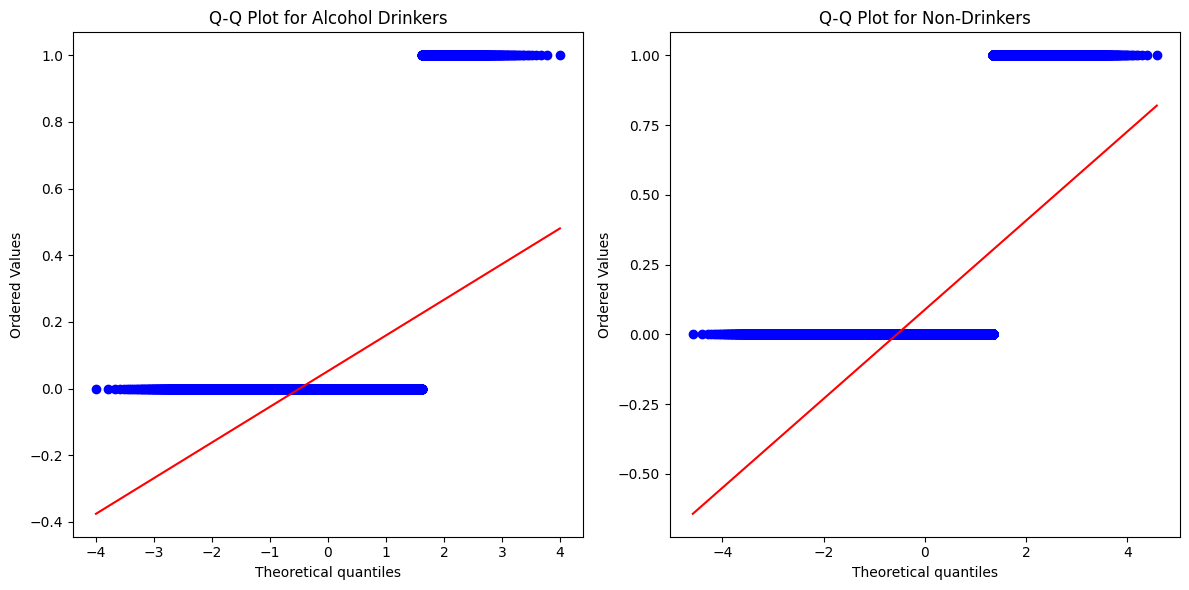


Shapiro-Wilk Test for Normality:
Alcohol Drinkers: Test Statistic = 0.23078639902938847, p-value = 9.470491555757763e-131
Non-Drinkers: Test Statistic = 0.31781600291544665, p-value = 1.4542355365879117e-199

Normality assumption is violated. Consider using a non-parametric test like the Mann-Whitney U test.
Mann-Whitney U Test Statistic: 3129361130.0
P-Value (Mann-Whitney U Test): 1.5070239663195748e-73
Reject the null hypothesis (Mann-Whitney U Test): There is a significant difference in heart disease occurrence between alcohol drinkers and non-drinkers.

Contingency Table:
 HeartDisease          0      1
AlcoholDrinking               
0                271786  26232
1                 20636   1141

Chi-Square Test Results:
Chi-Square Statistic: 328.64916890132054
P-Value (Chi-Square): 1.892352227090306e-73
Degrees of Freedom: 1
Expected Frequencies:
[[272509.01232352  25508.98767648]
 [ 19912.98767648   1864.01232352]]
Reject the null hypothesis (Chi-Square): There is a significant a

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21777.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 298018.
  res = hypotest_fun_out(*samples, **kwds)


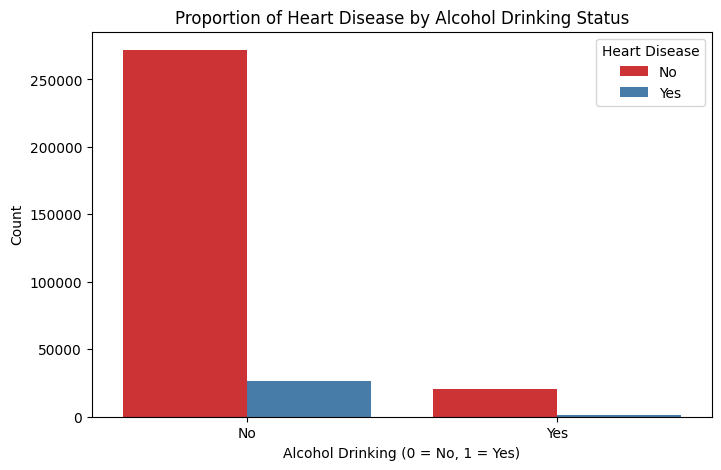

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Preparing the data by converting to numerical values
df['AlcoholDrinking'] = df['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

# Checking for missing values
print("Missing values:\n", df[['HeartDisease', 'AlcoholDrinking']].isnull().sum())

# Dropping rows with missing values
df = df.dropna(subset=['HeartDisease', 'AlcoholDrinking'])

# Create separate groups based on alcohol consumption
group_yes = df[df['AlcoholDrinking'] == 1]['HeartDisease']
group_no = df[df['AlcoholDrinking'] == 0]['HeartDisease']

# --- Step 1: Check for Normality ---

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(group_yes, kde=True, color='blue', bins=20)
plt.title('Alcohol Drinkers - Heart Disease Distribution')

plt.subplot(1, 2, 2)
sns.histplot(group_no, kde=True, color='red', bins=20)
plt.title('Non-Drinkers - Heart Disease Distribution')

plt.tight_layout()
plt.show()

# Q-Q Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(group_yes, dist="norm", plot=plt)
plt.title('Q-Q Plot for Alcohol Drinkers')

plt.subplot(1, 2, 2)
stats.probplot(group_no, dist="norm", plot=plt)
plt.title('Q-Q Plot for Non-Drinkers')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
print("\nShapiro-Wilk Test for Normality:")

# Shapiro-Wilk test for alcohol drinkers
stat_yes, p_value_yes = stats.shapiro(group_yes)
print(f"Alcohol Drinkers: Test Statistic = {stat_yes}, p-value = {p_value_yes}")

# Shapiro-Wilk test for non-drinkers
stat_no, p_value_no = stats.shapiro(group_no)
print(f"Non-Drinkers: Test Statistic = {stat_no}, p-value = {p_value_no}")

# --- Step 2: T-Test Analysis ---
alpha = 0.05  # Significance level

# Based on normality, proceed with T-Test
if p_value_yes > alpha and p_value_no > alpha:
    print("\nBoth groups are approximately normal. Proceeding with the T-Test.")

    # Performing the t-test
    t_stat, p_val_ttest = stats.ttest_ind(group_yes, group_no, equal_var=False)

    # T-Test results
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value (T-Test): {p_val_ttest}")

    # Interpreting T-Test results
    if p_val_ttest < alpha:
        print("Reject the null hypothesis (T-Test): There is a significant difference in heart disease occurrence between alcohol drinkers and non-drinkers.")
    else:
        print("Fail to reject the null hypothesis (T-Test): There is no significant difference in heart disease occurrence between alcohol drinkers and non-drinkers.")
else:
    print("\nNormality assumption is violated. Consider using a non-parametric test like the Mann-Whitney U test.")

    # Perform Mann-Whitney U test if normality is violated
    u_stat, p_val_mannwhitney = stats.mannwhitneyu(group_yes, group_no)
    print(f"Mann-Whitney U Test Statistic: {u_stat}")
    print(f"P-Value (Mann-Whitney U Test): {p_val_mannwhitney}")

    # Interpreting Mann-Whitney U test results
    if p_val_mannwhitney < alpha:
        print("Reject the null hypothesis (Mann-Whitney U Test): There is a significant difference in heart disease occurrence between alcohol drinkers and non-drinkers.")
    else:
        print("Fail to reject the null hypothesis (Mann-Whitney U Test): There is no significant difference in heart disease occurrence between alcohol drinkers and non-drinkers.")

# --- Step 3: Chi-Square Test ---
# Creating a contingency table
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['HeartDisease'])
print("\nContingency Table:\n", contingency_table)

# Chi-Square Test of Independence
chi2_stat, p_val_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# Chi-Square results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value (Chi-Square): {p_val_chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpreting Chi-Square results
if p_val_chi2 < alpha:
    print("Reject the null hypothesis (Chi-Square): There is a significant association between alcohol drinking and heart disease.")
else:
    print("Fail to reject the null hypothesis (Chi-Square): There is no significant association between alcohol drinking and heart disease.")

# --- Step 4: Visualisation ---
plt.figure(figsize=(8, 5))
sns.countplot(x='AlcoholDrinking', hue='HeartDisease', data=df, palette='Set1')
plt.title('Proportion of Heart Disease by Alcohol Drinking Status')
plt.xlabel('Alcohol Drinking (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()


<hr>

GENERAL: LOGISTIC REGRESSION ANALYSIS

Optimization terminated successfully.
         Current function value: 0.227163
         Iterations 9


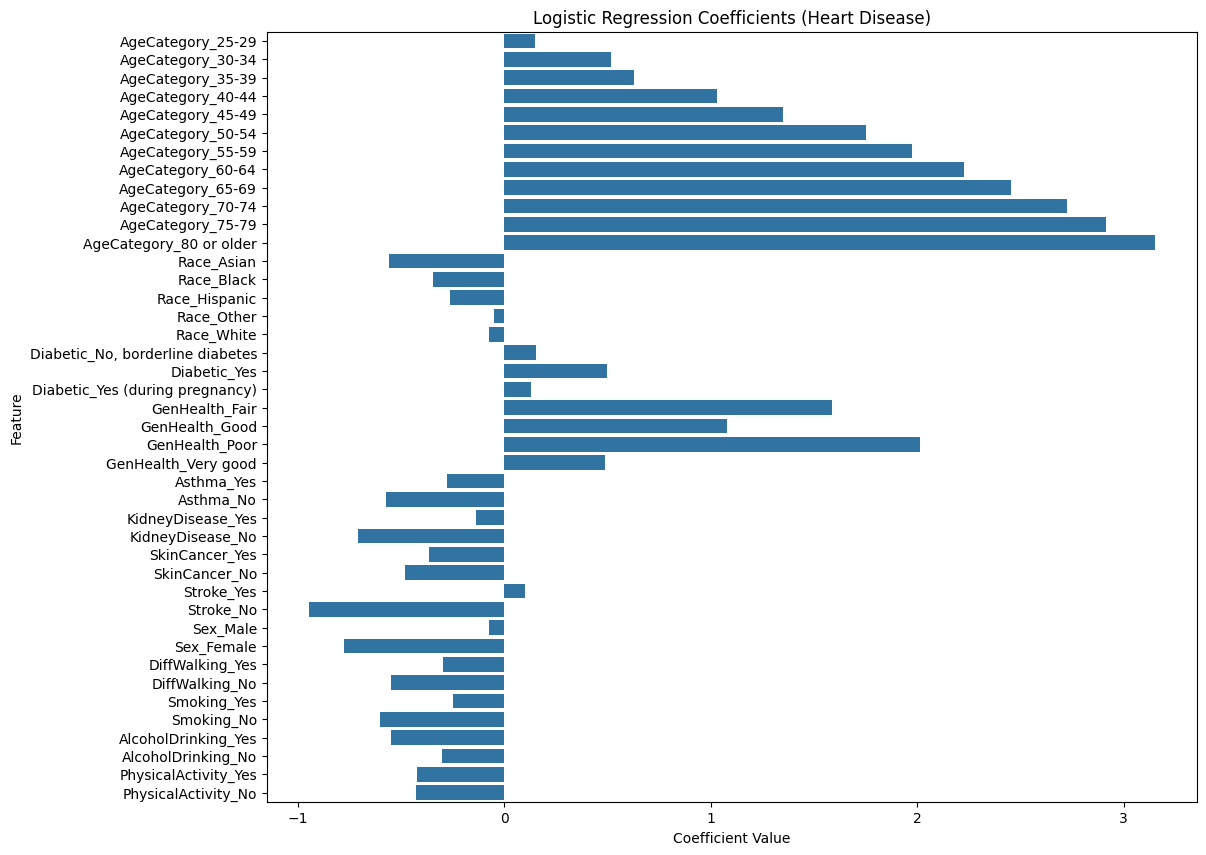

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation
categorical_cols = ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']
df_categoricals = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_asthma_yes = df['Asthma'].map({'Yes': 1, 'No': 0}).rename('Asthma_Yes')
df_asthma_no = df['Asthma'].map({'Yes': 0, 'No': 1}).rename('Asthma_No')
df_kidney_yes = df['KidneyDisease'].map({'Yes': 1, 'No': 0}).rename('KidneyDisease_Yes')
df_kidney_no = df['KidneyDisease'].map({'Yes': 0, 'No': 1}).rename('KidneyDisease_No')
df_skin_yes = df['SkinCancer'].map({'Yes': 1, 'No': 0}).rename('SkinCancer_Yes')
df_skin_no = df['SkinCancer'].map({'Yes': 0, 'No': 1}).rename('SkinCancer_No')
df_stroke_yes = df['Stroke'].map({'Yes': 1, 'No': 0}).rename('Stroke_Yes')
df_stroke_no = df['Stroke'].map({'Yes': 0, 'No': 1}).rename('Stroke_No')
df_sex_male = df['Sex'].map({'Male': 1, 'Female': 0}).rename('Sex_Male')
df_sex_female = df['Sex'].map({'Male': 0, 'Female': 1}).rename('Sex_Female')
df_diffwalking_yes = df['DiffWalking'].map({'Yes': 1, 'No': 0}).rename('DiffWalking_Yes')
df_diffwalking_no = df['DiffWalking'].map({'Yes': 0, 'No': 1}).rename('DiffWalking_No')
df_smoking_yes = df['Smoking'].map({'Yes': 1, 'No': 0}).rename('Smoking_Yes')
df_smoking_no = df['Smoking'].map({'Yes': 0, 'No': 1}).rename('Smoking_No')
df_alcohol_yes = df['AlcoholDrinking'].map({'Yes': 1, 'No': 0}).rename('AlcoholDrinking_Yes')
df_alcohol_no = df['AlcoholDrinking'].map({'Yes': 0, 'No': 1}).rename('AlcoholDrinking_No')
df_physical_yes = df['PhysicalActivity'].map({'Yes': 1, 'No': 0}).rename('PhysicalActivity_Yes')
df_physical_no = df['PhysicalActivity'].map({'Yes': 0, 'No': 1}).rename('PhysicalActivity_No')

df_categoricals = df_categoricals.join([df_asthma_yes, df_asthma_no, df_kidney_yes, df_kidney_no, df_skin_yes, df_skin_no, df_stroke_yes, df_stroke_no, df_sex_male, df_sex_female, df_diffwalking_yes, df_diffwalking_no, df_smoking_yes, df_smoking_no, df_alcohol_yes, df_alcohol_no, df_physical_yes, df_physical_no])
df_categoricals.drop(['Asthma', 'KidneyDisease', 'SkinCancer', 'Stroke', 'Sex', 'DiffWalking', 'Smoking', 'AlcoholDrinking', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'PhysicalActivity'], axis=1, inplace=True)
df_categoricals['HeartDisease'] = df_categoricals['HeartDisease'].map({'Yes': 1, 'No': 0})

# 2. Model Building
X = df_categoricals.drop('HeartDisease', axis=1).astype(int)
y = df_categoricals['HeartDisease']

X = sm.add_constant(X)  # Add constant for intercept
model = sm.Logit(y, X).fit()

# 3. Coefficient Plot
coef = model.params[1:]  # Exclude the constant term
feature_names = X.columns[1:]  # Exclude the constant column name

plt.figure(figsize=(12, 10))
sns.barplot(x=coef, y=feature_names)
plt.title('Logistic Regression Coefficients (Heart Disease)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

**Explanation of Model and Data Preparation:**

* Model:
  * We used a logistic regression model from the statsmodels library. Logistic regression is suitable for binary classification problems (predicting 'Yes' or 'No' for heart disease).
  * The model was fit using the fit() method, which estimates the coefficients that best describe the relationship between the features and the target variable.

* Data Preparation:
  * Categorical Encoding: The categorical variables were converted into numerical representations using one-hot encoding (i.e. convert categorical data [yes, no] into numerical data [1, 0]). This is necessary because logistic regression works with numerical data.
  * Handling Multicollinearity: The drop_first=True argument in get_dummies was used to prevent multicollinearity, which can occur when dummy variables are highly correlated.
  * Target Variable Conversion: The target variable ('HeartDisease') was converted into numerical values (1 and 0) to be compatible with the logistic regression model.
  * Constant Term: A constant term was added to the features using sm.add_constant() to allow the model to estimate an intercept.
  * Feature and Target Separation: The features (X) and target variable (y) were separated for model training.


**Strong Positive Associations (Increased Heart Disease Risk):**

* Age: Older age categories (especially 70-74, 75-79, and 80 or older) show a
very strong positive association with heart disease. This aligns with known medical risk factors.
* General Health: "GenHealth_Poor" has a significant positive coefficient, indicating that poor general health is a strong predictor of heart disease.
* Diabetes: "Diabetic_Yes" also shows a positive association, meaning individuals with diabetes have a higher likelihood of heart disease.
* Walking Difficulty: "DiffWalking_Yes" shows that those who have difficulty walking have a higher likelihood of heart disease.

**Negative Associations (Decreased Heart Disease Risk):**

* Race: Certain racial categories (Asian, Black, Hispanic) show negative associations compared to the reference category.
* General Health: "GenHealth_Good" and "GenHealth_Very good" have negative coefficients, indicating better general health is associated with lower risk.
* Sex: "Sex_Female" shows a negative association, suggesting females have a lower likelihood of heart disease compared to males (the reference).
* Physical Activity: "PhysicalActivity_Yes" shows a negative coefficient, indicating that physical activity lowers the likelihood of heart disease.

<hr>

HYPOTHESIS:  BMI vs HEART DISEASE

Text(0, 0.5, 'count')

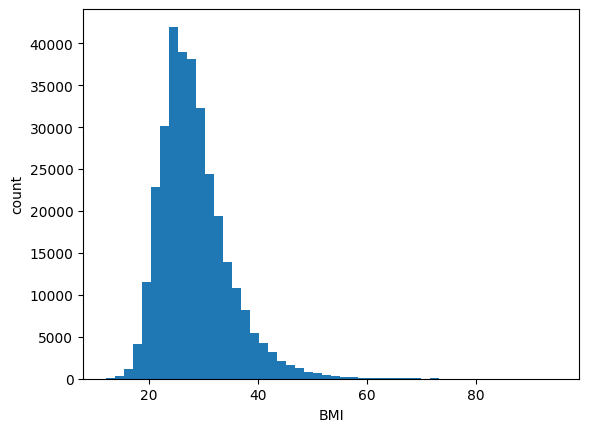

In [ ]:
# Plot BMI data histogram to check for normality
plt.hist(df.BMI,bins=50);
plt.xlabel('BMI')
plt.ylabel('count')

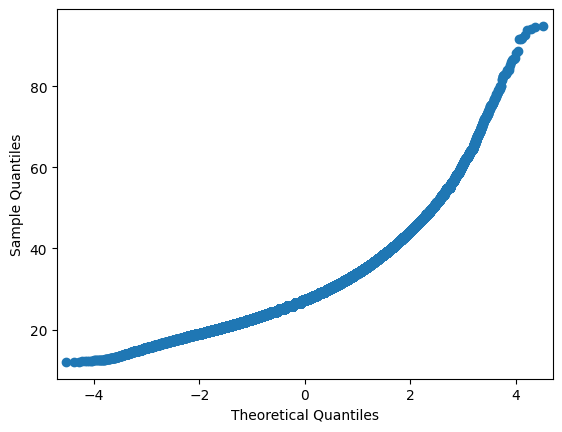

In [ ]:
# Confirm BMI data skewed using QQ plot
import pylab
sm.qqplot(df.BMI)#,line='45')
pylab.show()

# BMI data is SKEWED (not normal)
# BMI and Heart Disease data is UNPAIRED
# use non-parametric alternatives (i.e. Mann-Whitney, Wilcoxin, Spearman's)

In [ ]:
# Spearman's correlation
import scipy.stats as sp
sp.spearmanr(df.BMI, df.HeartDisease, axis=0, nan_policy='propagate', alternative='two-sided')

SignificanceResult(statistic=np.float64(0.05735480604688076), pvalue=np.float64(3.791736687178055e-231))

In [ ]:
# Mann-Whitney
from scipy.stats import mannwhitneyu
yes = df['BMI'][df['HeartDisease'] == 'Yes']
no = df['BMI'][df['HeartDisease'] == 'No']
stat, p = mannwhitneyu(yes, no)
print(f"Mann-Whitney U statistic: {stat}, p-value: {p}")

Mann-Whitney U statistic: 4475945989.5, p-value: 9.008983218779159e-231


<Axes: title={'center': 'BMI'}, xlabel='[HeartDisease]'>

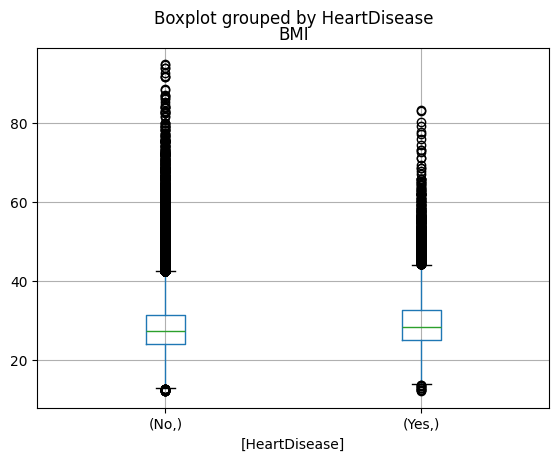

In [ ]:
# Boxplot for visual comparison
df.boxplot(column='BMI', by=['HeartDisease'])


# Spearman and Mann-Whitney statitstic show very small p-values (e-231) so no significance!
# Boxplot also shows no strong correlation with many high BMI subjects w/o heart disease and vice versa

<hr>

HYPOTHESIS: WHAT FACTORS IMPACT THE PERCEPTION OF "GENERAL HEALTH" AND HOW MUCH OF THE IMPACT IS HAVING HEART DISEASE CONTRIBUTING

In [ ]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [ ]:
contingency_table = pd.crosstab(df['HeartDisease'], df['GenHealth'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

alpha = 0.05
if p < alpha:
  print("There is a statistically significant association between HeartDisease and GenHealth.")
else:
  print("There is no statistically significant association between HeartDisease and GenHealth.")


Chi-square test results:
Chi2 statistic: 21542.177
P-value: 0.000
Degrees of freedom: 4
Expected frequencies:
 [[ 61120.62829     31708.80624775  85157.58044372  10322.71285667
  104112.27216185]
 [  5721.37171      2968.19375225   7971.41955628    966.28714333
    9745.72783815]]
There is a statistically significant association between HeartDisease and GenHealth.


Visualize the relative impact between GenHealth and Heart Disease

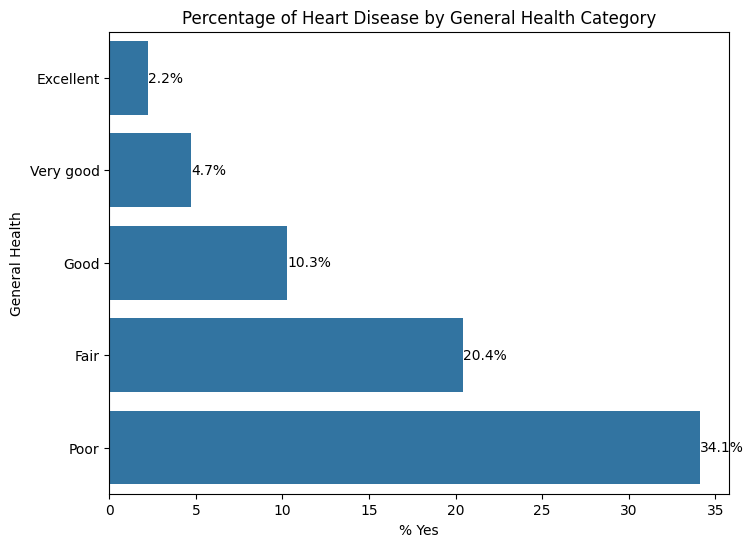

In [ ]:
# Calculate the percentage of 'Yes' for HeartDisease within each GenHealth category
genhealth_heartdisease = df.groupby('GenHealth')['HeartDisease'].value_counts(normalize=True).unstack() * 100
genhealth_heartdisease = genhealth_heartdisease[['Yes']]
genhealth_heartdisease = genhealth_heartdisease.rename(columns={'Yes': '% Yes'})

# Define the order for the GenHealth categories on the y-axis
genhealth_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='% Yes', y=genhealth_heartdisease.index, data=genhealth_heartdisease, order=genhealth_order)
plt.xlabel('% Yes')
plt.ylabel('General Health')
plt.title('Percentage of Heart Disease by General Health Category')

for index, row in genhealth_heartdisease.iterrows():
  plt.text(row['% Yes'], genhealth_order.index(index), f"{row['% Yes']:.1f}%", va='center', ha='left')

plt.show()


The worse the reported general health, the higher % of heart disease. But since the General Health is based on self-reporting (from the dataset description) and I would assume that the definitions/perceptions (e.g. what is fair vs poor) can vary from individual to individual, I want to see if I can break it down and understand what are some factors that influence General Health.

Understanding what factors may impact "GenHealth" self-reporting

In [ ]:
categorical_cols2 = ['AgeCategory', 'Race', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Stroke', 'Sex', 'DiffWalking', 'Smoking', 'AlcoholDrinking', 'PhysicalActivity']

for col in categorical_cols2:
  contingency_table = pd.crosstab(df['GenHealth'], df[col])
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  print(f"Chi-squared test for GenHealth vs. {col}:")
  print(f"  Chi2 statistic: {chi2}")
  print(f"  P-value: {p}")
  print(f"  Degrees of freedom: {dof}")
  alpha = 0.05
  if p < alpha:
    print(f"  There is a statistically significant association between GenHealth and {col}.")
  else:
    print(f"  There is no statistically significant association between GenHealth and {col}.")
  print("--------------------")


Chi-squared test for GenHealth vs. AgeCategory:
  Chi2 statistic: 11979.797058190876
  P-value: 0.0
  Degrees of freedom: 48
  There is a statistically significant association between GenHealth and AgeCategory.
--------------------
Chi-squared test for GenHealth vs. Race:
  Chi2 statistic: 4622.28463490022
  P-value: 0.0
  Degrees of freedom: 20
  There is a statistically significant association between GenHealth and Race.
--------------------
Chi-squared test for GenHealth vs. Diabetic:
  Chi2 statistic: 27025.523253044546
  P-value: 0.0
  Degrees of freedom: 12
  There is a statistically significant association between GenHealth and Diabetic.
--------------------
Chi-squared test for GenHealth vs. Asthma:
  Chi2 statistic: 6375.407775688224
  P-value: 0.0
  Degrees of freedom: 4
  There is a statistically significant association between GenHealth and Asthma.
--------------------
Chi-squared test for GenHealth vs. KidneyDisease:
  Chi2 statistic: 11902.707210848
  P-value: 0.0
  Degre

Check numeric variables with GenHealth for significant associations

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop('GenHealth_Binary', errors='ignore')

# Perform Shapiro-Wilk test for each numeric column
for col in numeric_cols:
    stat, p = shapiro(df[col].dropna())  # Handle potential missing values
    print(f"Shapiro-Wilk Test for '{col}':")
    print(f"  Statistic: {stat:.3f}")
    print(f"  P-value: {p:.3f}")
    alpha = 0.05
    if p > alpha:
        print("  Sample looks Gaussian (fail to reject H0)")
    else:
        print("  Sample does not look Gaussian (reject H0)")
    print("-" * 20)

Shapiro-Wilk Test for 'BMI':
  Statistic: 0.928
  P-value: 0.000
  Sample does not look Gaussian (reject H0)
--------------------
Shapiro-Wilk Test for 'PhysicalHealth':
  Statistic: 0.476
  P-value: 0.000
  Sample does not look Gaussian (reject H0)
--------------------
Shapiro-Wilk Test for 'MentalHealth':
  Statistic: 0.551
  P-value: 0.000
  Sample does not look Gaussian (reject H0)
--------------------
Shapiro-Wilk Test for 'SleepTime':
  Statistic: 0.890
  P-value: 0.000
  Sample does not look Gaussian (reject H0)
--------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 319795.
  res = hypotest_fun_out(*samples, **kwds)


As all of the numeric variables are not normally distributed as per the Shapiro-Wilk test, we will use Kruskal-Wallis test to determine if there are differences in distribution across GenHealth

In [ ]:
from scipy.stats import kruskal

for col in numeric_cols:
  groups = [df[col][df['GenHealth'] == genhealth] for genhealth in df['GenHealth'].unique()]
  stat, p = kruskal(*groups)
  print(f"Kruskal-Wallis Test for '{col}' vs 'GenHealth':")
  print(f"  Statistic: {stat:.3f}")
  print(f"  P-value: {p:.3f}")
  alpha = 0.05
  if p < alpha:
    print(f"  There is a statistically significant difference in the distribution of '{col}' across different 'GenHealth' groups.")
  else:
    print(f"  There is no statistically significant difference in the distribution of '{col}' across different 'GenHealth' groups.")
  print("-" * 20)


Kruskal-Wallis Test for 'BMI' vs 'GenHealth':
  Statistic: 17393.882
  P-value: 0.000
  There is a statistically significant difference in the distribution of 'BMI' across different 'GenHealth' groups.
--------------------
Kruskal-Wallis Test for 'PhysicalHealth' vs 'GenHealth':
  Statistic: 76034.534
  P-value: 0.000
  There is a statistically significant difference in the distribution of 'PhysicalHealth' across different 'GenHealth' groups.
--------------------
Kruskal-Wallis Test for 'MentalHealth' vs 'GenHealth':
  Statistic: 13749.765
  P-value: 0.000
  There is a statistically significant difference in the distribution of 'MentalHealth' across different 'GenHealth' groups.
--------------------
Kruskal-Wallis Test for 'SleepTime' vs 'GenHealth':
  Statistic: 2146.572
  P-value: 0.000
  There is a statistically significant difference in the distribution of 'SleepTime' across different 'GenHealth' groups.
--------------------


From the above tests, its seems that GenHealth is a complex variable that can encompass/has significant associations with every other variable in the dataset. Next will check which variables may contribute to "Poor" or "Fair" health (transformed binary variable from GenHealth)

Optimization terminated successfully.
         Current function value: 0.313857
         Iterations 7


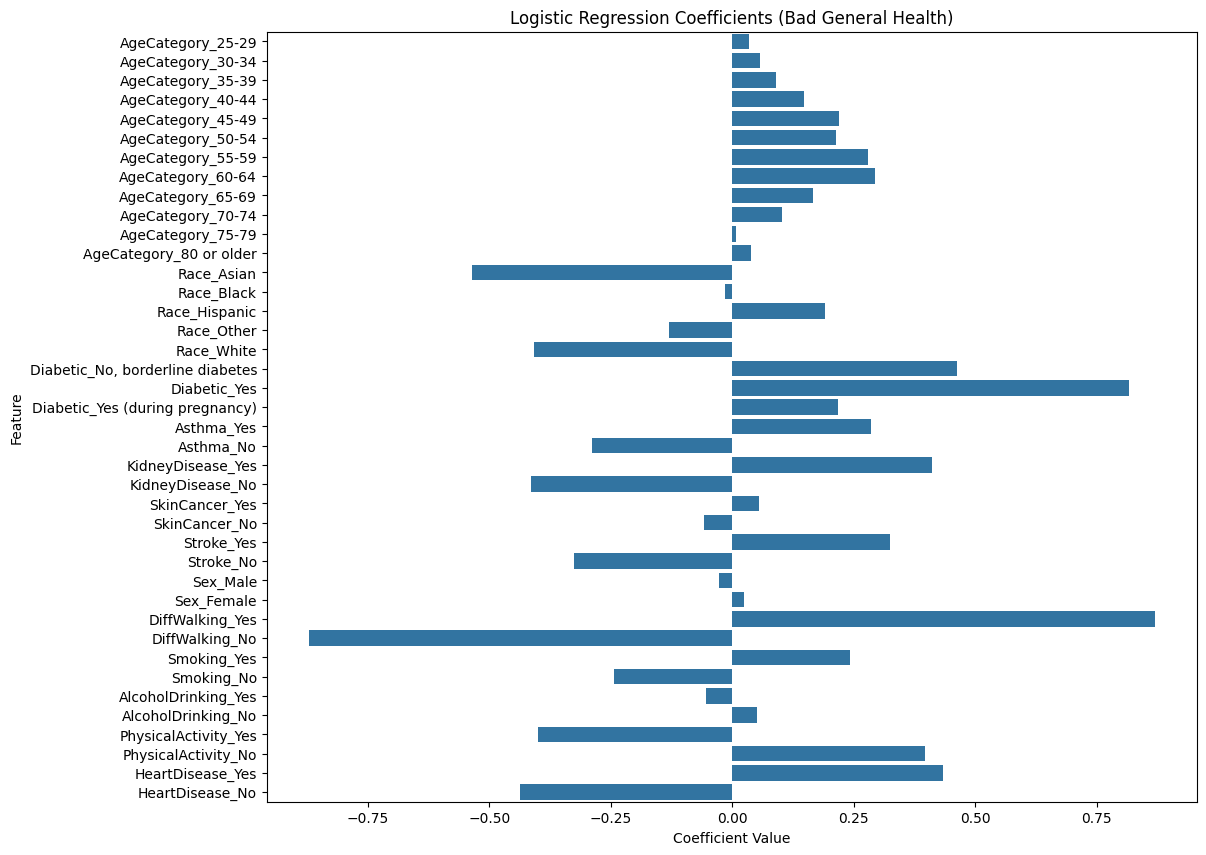

In [ ]:
categorical_cols = ['AgeCategory', 'Race', 'Diabetic']
df_categoricals = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_heartdisease_yes = df['HeartDisease'].map({'Yes': 1, 'No': 0}).rename('HeartDisease_Yes')
df_heartdisease_no = df['HeartDisease'].map({'Yes': 0, 'No': 1}).rename('HeartDisease_No')
df_asthma_yes = df['Asthma'].map({'Yes': 1, 'No': 0}).rename('Asthma_Yes')
df_asthma_no = df['Asthma'].map({'Yes': 0, 'No': 1}).rename('Asthma_No')
df_kidney_yes = df['KidneyDisease'].map({'Yes': 1, 'No': 0}).rename('KidneyDisease_Yes')
df_kidney_no = df['KidneyDisease'].map({'Yes': 0, 'No': 1}).rename('KidneyDisease_No')
df_skin_yes = df['SkinCancer'].map({'Yes': 1, 'No': 0}).rename('SkinCancer_Yes')
df_skin_no = df['SkinCancer'].map({'Yes': 0, 'No': 1}).rename('SkinCancer_No')
df_stroke_yes = df['Stroke'].map({'Yes': 1, 'No': 0}).rename('Stroke_Yes')
df_stroke_no = df['Stroke'].map({'Yes': 0, 'No': 1}).rename('Stroke_No')
df_sex_male = df['Sex'].map({'Male': 1, 'Female': 0}).rename('Sex_Male')
df_sex_female = df['Sex'].map({'Male': 0, 'Female': 1}).rename('Sex_Female')
df_diffwalking_yes = df['DiffWalking'].map({'Yes': 1, 'No': 0}).rename('DiffWalking_Yes')
df_diffwalking_no = df['DiffWalking'].map({'Yes': 0, 'No': 1}).rename('DiffWalking_No')
df_smoking_yes = df['Smoking'].map({'Yes': 1, 'No': 0}).rename('Smoking_Yes')
df_smoking_no = df['Smoking'].map({'Yes': 0, 'No': 1}).rename('Smoking_No')
df_alcohol_yes = df['AlcoholDrinking'].map({'Yes': 1, 'No': 0}).rename('AlcoholDrinking_Yes')
df_alcohol_no = df['AlcoholDrinking'].map({'Yes': 0, 'No': 1}).rename('AlcoholDrinking_No')
df_physical_yes = df['PhysicalActivity'].map({'Yes': 1, 'No': 0}).rename('PhysicalActivity_Yes')
df_physical_no = df['PhysicalActivity'].map({'Yes': 0, 'No': 1}).rename('PhysicalActivity_No')
df_bad_genhealth = df['GenHealth'].map({'Excellent': 0, 'Very good':0, 'Good':0, 'Fair': 1, 'Poor': 1}).rename('Bad_GenHealth')

df_categoricals = df_categoricals.join([df_asthma_yes, df_asthma_no, df_kidney_yes, df_kidney_no, df_skin_yes, df_skin_no, df_stroke_yes, df_stroke_no, df_sex_male, df_sex_female, df_diffwalking_yes, df_diffwalking_no, df_smoking_yes, df_smoking_no, df_alcohol_yes, df_alcohol_no, df_physical_yes, df_physical_no,df_heartdisease_yes,df_heartdisease_no,df_bad_genhealth])
df_categoricals.drop(['HeartDisease','GenHealth','Asthma', 'KidneyDisease', 'SkinCancer', 'Stroke', 'Sex', 'DiffWalking', 'Smoking', 'AlcoholDrinking', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'PhysicalActivity'], axis=1, inplace=True)

# 2. Model Building
X = df_categoricals.drop('Bad_GenHealth', axis=1).astype(int)
y = df_categoricals['Bad_GenHealth']

X = sm.add_constant(X)  # Add constant for intercept
model = sm.Logit(y, X).fit()

# 3. Coefficient Plot
coef = model.params[1:]  # Exclude the constant term
feature_names = X.columns[1:]  # Exclude the constant column name

plt.figure(figsize=(12, 10))
sns.barplot(x=coef, y=feature_names)
plt.title('Logistic Regression Coefficients (Bad General Health)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Convert to odds ratio, understand which factors are more likely to report fair/poor health

In [ ]:
import numpy as np

coef = model.params[1:]
feature_names = X.columns[1:]

odds_ratios = np.exp(coef)
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef, 'Odds Ratio': odds_ratios})

coef_df['Rank'] = coef_df['Odds Ratio'].rank(ascending=False)
coef_df = coef_df.sort_values(by='Rank')

coef_df


,Feature,Coefficient,Odds Ratio,Rank
DiffWalking_Yes,DiffWalking_Yes,0.868827,2.384113,1.0
Diabetic_Yes,Diabetic_Yes,0.816725,2.263077,2.0
"Diabetic_No, borderline diabetes","Diabetic_No, borderline diabetes",0.461672,1.586726,3.0
HeartDisease_Yes,HeartDisease_Yes,0.434271,1.543837,4.0
KidneyDisease_Yes,KidneyDisease_Yes,0.411846,1.509602,5.0
PhysicalActivity_No,PhysicalActivity_No,0.397339,1.487860,6.0
Stroke_Yes,Stroke_Yes,0.323589,1.382079,7.0
AgeCategory_60-64,AgeCategory_60-64,0.294320,1.342214,8.0
Asthma_Yes,Asthma_Yes,0.285538,1.330478,9.0
AgeCategory_55-59,AgeCategory_55-59,0.279087,1.321922,10.0


The presence of Heart Disease is one of the top features that increases the odds of reported bad general health, but having difficulty walking and diabetes seem to increase the odds of reporting bad health even more. It is interesting that while heart disease seems like a very scary condition, the impact on the perception of general health is not actually the worst, presumbly because from a day to day basis, managing difficulty walking and diabetes is more burdensome.

<hr>